Use digits dataset. Implement a knn classifier, a SVM classifier and a neural network classifier for this dataset. Compare the results and performance of these three classifiers.  

In [1]:
#importing digits dataset
from sklearn import datasets
digit=datasets.load_digits()

In [14]:
digit.data.shape

(1797, 64)

In [16]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [2]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
digit.data=ss.fit_transform(digit.data)

In [3]:
#splitting training and testing set
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(digit.data, digit.target, test_size=0.2)

In [5]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#checking training and testing accuracy for different k values in KNN model
neighbors=np.arange(1,11)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i]=knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

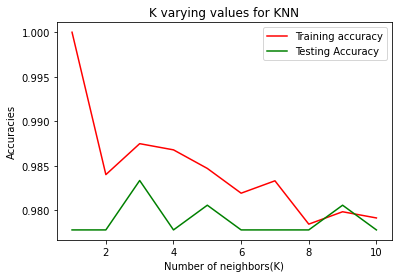

In [46]:
#plotting training and testing accuracies for different k values in KNN model
import matplotlib.pyplot as plt
plt.title('K varying values for KNN')
plt.plot(neighbors,train_accuracy,'r',label='Training accuracy')
plt.plot(neighbors,test_accuracy,'g',label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors(K)')
plt.ylabel('Accuracies')
plt.show()

In [55]:
#K=9 is the best number of neighbors from above plot
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [51]:
#predicting for new instances with KNN model
y_pred_knn=knn.predict(x_test)

In [52]:
#importing classification_report
from sklearn.metrics import classification_report
print("The report of accuracies of KNN model:\n",classification_report(y_test,y_pred_knn))

The report of accuracies of KNN model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.90      1.00      0.95        37
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        44
           4       1.00      0.97      0.98        32
           5       1.00      0.94      0.97        36
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.98        32
           8       1.00      0.93      0.96        41
           9       0.92      1.00      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
#training and testing accuracy for KNN model
print("Training accuracy of KNN:",knn.score(x_train,y_train)*100)
print("Testing accuracy of KNN:",knn.score(x_test,y_test)*100)

Training accuracy of KNN: 97.98190675017398
Testing accuracy of KNN: 98.05555555555556


In [50]:
#implementing svm.SVC with RBF kernel
from sklearn.svm import SVC
rbf_svc=SVC(kernel='rbf',gamma=0.001, C=1.0)
rbf_svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
#predicting test instances with SVM model
y_pred_svc=rbf_svc.predict(x_test)

In [54]:
print("The report of accuracies of SVM model:\n",classification_report(y_test,y_pred_svc))

The report of accuracies of SVM model:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.82      0.97      0.89        37
           2       0.97      0.94      0.95        31
           3       1.00      0.95      0.98        44
           4       0.97      0.97      0.97        32
           5       0.97      0.94      0.96        36
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.98        32
           8       0.95      0.85      0.90        41
           9       0.89      0.97      0.93        34

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [57]:
#training and testing accuracy for SVM model
print("Training accuracy of SVM:",rbf_svc.score(x_train,y_train)*100)
print("Testing accuracy of SVM:",rbf_svc.score(x_test,y_test)*100)

Training accuracy of SVM: 95.96381350034795
Testing accuracy of SVM: 95.0


In [75]:
#implementing Multi-layer perceptron classifier
from sklearn.neural_network import MLPClassifier  
mlp=MLPClassifier(alpha=0.001,max_iter=300)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [76]:
#predicting test instances with MLP classifier model
y_pred_mlp=mlp.predict(x_test)

In [77]:
print("The report of accuracies of MLP model:\n",classification_report(y_test,y_pred_mlp))

The report of accuracies of MLP model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.90      1.00      0.95        37
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        44
           4       1.00      0.97      0.98        32
           5       0.97      0.97      0.97        36
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.98        32
           8       1.00      0.93      0.96        41
           9       0.94      1.00      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [79]:
#training and testing accuracy of neural network model
print('Training Accuracy of MLP model:',mlp.score(x_train,y_train)*100)
print('Testing Accuracy of MLP model:',mlp.score(x_test,y_test)*100)

Training Accuracy of MLP model: 100.0
Testing Accuracy of MLP model: 98.05555555555556
